# 📊 Análise Exploratória de Dados (EDA) - Human Resources

Este notebook realiza uma Análise Exploratória de Dados (EDA) sobre o dataset de Recursos Humanos.

## 1. Escopo da Análise

#### 1.1. Problema de Negócio  
O problema central é a alta rotatividade de funcionários (turnover) e seus custos associados. A empresa precisa entender os principais fatores que levam os funcionários a deixarem a organização para que possa criar estratégias de retenção mais eficazes, como programas de desenvolvimento, ajustes de salário ou melhorias no ambiente de trabalho.

#### 1.2. Contexto
A empresa está enfrentando um problema de retenção de talentos que afeta a produtividade, a moral da equipe e gera custos elevados com a contratação e treinamento de novos colaboradores. O conjunto de dados de Recursos Humanos fornece uma ampla gama de informações sobre os funcionários, e a EDA será a primeira etapa para identificar padrões e guiar as decisões do setor de RH.

## 2. Análise da base de dados  
🔎 **Objetivo:** Verificar dimensões, tipos de dados e presença de valores nulos e duplicados.

#### 2.1 Importação de bibliotecas  
Primeiro, importamos as bibliotecas necessárias para manipulação, visualização e análise estatística.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency, ttest_ind

#### 2.2 Carregamento do dataset
🔎 **Objetivo:** Carregar o dataset `Human_Resources.csv` e verificar suas primeiras linhas.

In [2]:
# Configurações gerais de estilo
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (8, 5)

# Carregar dataset
df = pd.read_csv('../data/raw/Human_Resources.csv')

#Exibir todas as colunas do dataset
pd.set_option('display.max_columns', None)

# Primeiras linhas
print("Dimensões:", df.shape)
df.head()

Dimensões: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### 2.3 Estrutura dos dados

In [3]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Verificar se existe valores nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Estatísticas descritivas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [6]:
#Verificar dados duplicados
print("Duplicated rows: ", df.duplicated().sum())

Duplicated rows:  0


In [7]:
# Total de valores únicos de cada variável
for i in df.columns[:35].tolist():
    print(f'{i}: {len(df[i].astype(str).value_counts())}')

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


## 3. Estratégia da Solução
A análise exploratória será guiada por uma série de perguntas e hipóteses para garantir que os insights sejam relevantes para o problema de negócio.

### 3.1 Pergunta de Análise:
Qual a probabilidade de um funcionário sair da empresa **(turnover)** e quais fatores o influenciam?

### 3.2 Definição da Coluna Fato: 
`Attrition` será a nossa principal coluna fato. É a variável de interesse que queremos prever e entender, e as outras colunas servirão para explicar a probabilidade de um funcionário pedir demissão.


### 3.3 Identificação das Dimensões:
As dimensões são as variáveis que fornecem o contexto e as características dos funcionários, que será usado para prever o turnover. Analisando o dataset podemos categorizar desse forma:  

- **Carreira e Remuneração:** `MonthlyIncome`, `JobLevel`, `TotalWorkingYears`, `YearsSinceLastPromotion`, `PercentSalaryHike`.

- **Bem-Estar e Ambiente de Trabalho:** `JobSatisfaction`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobInvolvement`, `WorkLifeBalance`.

- **Horas e Carga de Trabalho:** `OverTime`, `DailyRate`, `HourlyRate`

- **Demografia e Localização**: `Age`, `Gender`, `MaritalStatus`, `DistanceFromHome`.

### 3.4 Hipóteses Analíticas:

- **H1 (Carreira e Remuneração)**: Funcionários com menor renda mensal `MonthlyIncome` ou que não foram promovidos recentemente `YearsSinceLastPromotion` tendem a ter uma taxa de turnover mais alta.

- **H2 (Satisfação e Bem-Estar)**: Existe uma relação negativa entre a satisfação no trabalho `JobSatisfaction` e o turnover. Pessoas com pior equilíbrio entre vida e trabalho `WorkLifeBalance` têm maior probabilidade de sair da empresa.

- **H3 (Horas e Carga de Trabalho)**: Pessoas que trabalham horas extras `OverTime` tendem a ter uma taxa de turnover mais alta.
- **H4 (Demografia e Localização)**: Funcionários que moram mais longe da empresa `DistanceFromHome` têm uma taxa de turnover maior. A idade `Age` e o estado civil `MaritalStatus` também podem influenciar o turnover.
- **H5 (Papel e Setor)**: A rotatividade de funcionários não é uniforme entre os diferentes cargos `JobRole` e departamentos `Department`.

### 3.5 Critérios de Priorização
As hipóteses serão priorizadas com base em seu potencial de impacto e na facilidade de implementação de soluções a partir dos resultados.

**Prioridade Alta: H1 (Carreira e Remuneração) e H3 (Horas e Carga de Trabalho).**

- **Justificativa**: Validar essas hipóteses oferece um caminho imediato para a tomada de decisão. A gestão pode, em teoria, ajustar a remuneração, criar planos de promoção ou revisar políticas de horas extras no curto prazo para mitigar a rotatividade..

**Prioridade Média: H2 (Satisfação e Bem-estar) e H5 (Papel e Setor)**.

- **Justificativa**: Essas hipóteses exigem uma análise mais profunda e ações mais complexas. Melhorar a satisfação ou resolver problemas de rotatividade em um setor específico leva tempo e pode exigir mudanças culturais ou de gestão que são de médio a longo prazo.

**Prioridade Baixa: H4 (Demografia e Localização).**.

- **Justificativa**: Embora a distância de casa ou a demografia possam influenciar o turnover, eles são fatores menos controláveis pela empresa. A análise dessas variáveis pode ser mais um sintoma de outras questões (como insatisfação) do que uma causa raiz.

## 4. Análise Exploratória e Hipóteses  
Vamos começar a explorar a relação entre as variáveis e o turnover para validar nossas hipóteses analíticas.

### 4. Distribuição da variável alvo (Attrition)
🔎 **Objetivo:** Analisar a distribuição da variável que é o foco do projeto. É crucial entender o desbalanceamento entre o número de funcionários que saíram (Yes) e os que ficaram (No), pois isso pode afetar a escolha do modelo preditivo mais adiante.

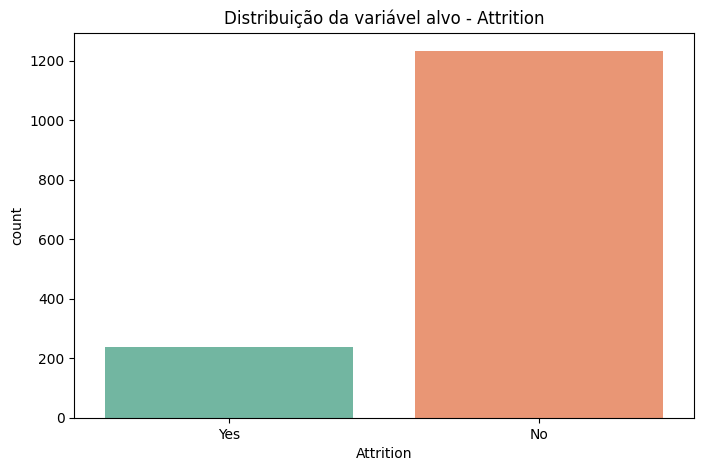

,count,%
Attrition,,
No,1233,83.877551
Yes,237,16.122449


In [8]:
sns.countplot(x='Attrition', data=df, palette='Set2', hue="Attrition")
plt.title('Distribuição da variável alvo - Attrition')
plt.show()

count = df['Attrition'].value_counts()
display(pd.DataFrame({'count':count, '%': (count/len(df))*100}))

**Análise do Resultado:** O gráfico e a tabela mostram um desbalanceamento significativo na base de dados. A maioria dos funcionários (84%) permaneceu na empresa (No), enquanto uma minoria (16%) saiu (Yes).

### 4.2 Relação entre Salário (MonthlyIncome) e Turnover  
🔎 **Objetivo:**  Testar a **Hipótese 1 (Carreira e Remuneração)**, se um salário baixo é um dos motivadores para a saída de um colaborador.

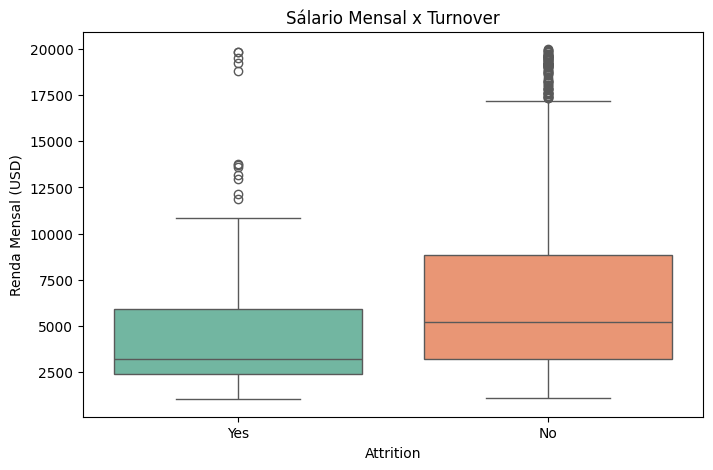

,count,mean,median,std,min,max
Attrition,,,,,,
No,1233,6832.74,5204.0,4818.21,1051,19999
Yes,237,4787.09,3202.0,3640.21,1009,19859


In [50]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2', hue='Attrition')
plt.title('Sálario Mensal x Turnover')
plt.ylabel('Renda Mensal (USD)')
plt.show()

stats_table = df.groupby('Attrition')['MonthlyIncome'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
display(stats_table.round(2))

### 4.3 Relação entre Satisfação (JobSatisfaction) e Turnover  
🔎 **Objetivo:**  Testar a Hipótese 2 (Satisfação e Bem-estar), verificando a relação entre o nível de satisfação no trabalho e a proporção de funcionários que pedem demissão.

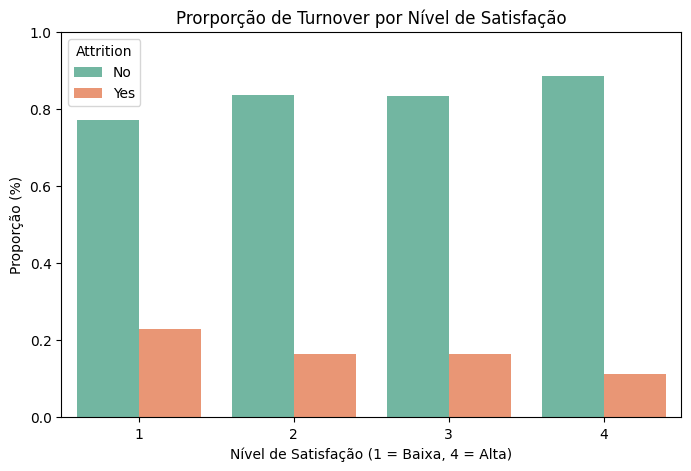

Attrition,No,Yes
JobSatisfaction,,
1,77.2,22.8
2,83.6,16.4
3,83.5,16.5
4,88.7,11.3


In [46]:
prop_satisfaction = (
    df.groupby('JobSatisfaction')['Attrition']
    .value_counts(normalize=True)
    .rename('Proportion')
    .reset_index()
)

sns.barplot(
    data=prop_satisfaction,
    x='JobSatisfaction',
    y='Proportion',
    hue='Attrition',
    palette='Set2'
)

plt.title('Prorporção de Turnover por Nível de Satisfação')
plt.xlabel("Nível de Satisfação (1 = Baixa, 4 = Alta)")
plt.ylabel("Proporção (%)")
plt.ylim(0,1)
plt.show()

prop_table = (
    df.groupby("JobSatisfaction")["Attrition"]
      .value_counts(normalize=True)
      .rename("Proportion")
      .mul(100)  # em %
      .round(1)
      .unstack()
)

display(prop_table)

O gráfico acima mostra a **proporção de funcionários que pediram demissão ("Yes") ou permaneceram ("No")** em cada nível de satisfação no trabalho (1 = Baixa, 4 = Alta).

- Funcionários **menos satisfeitos (nível 1)** apresentam uma taxa de saída consideravelmente maior em aproximadamente 23%.  
- Já entre os **mais satisfeitos (nível 4)**, a taxa de saída cai para cerca de 11%.  
- Isso confirma a hipótese de que **baixa satisfação está fortemente associada ao turnover**.

A tabela complementar resume os valores percentuais, deixando a comparação ainda mais clara.


### 4.4 Relação entre Horas Extras (OverTime) e Turnover 
🔎 **Objetivo:** Testar a **Hipótese 3 (Horas e Carga de Trabalho)**, analisando se o trabalho em horas extras está associado a uma maior taxa de turnover.

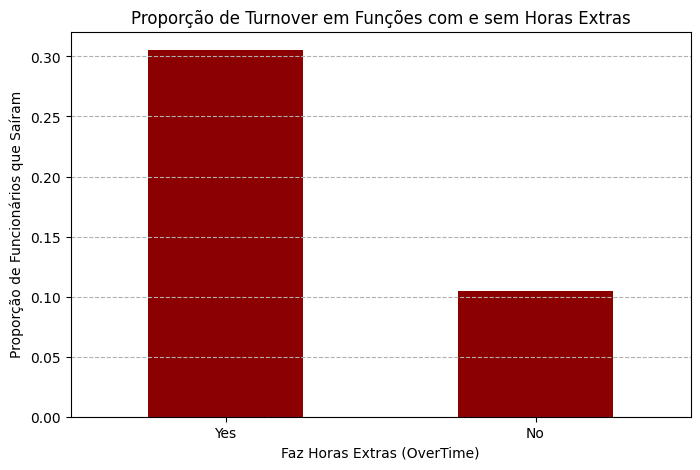

Attrition,No,Yes
OverTime,,
No,89.6,10.4
Yes,69.5,30.5


In [52]:
# Cria uma tabela de proporção de saída para cada categoria de OverTime
prop_overtime = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Plota a proporção de 'Yes' (saída)
prop_overtime['Yes'].sort_values(ascending=False).plot(kind='bar', color='darkred')
plt.title('Proporção de Turnover em Funções com e sem Horas Extras')
plt.ylabel('Proporção de Funcionários que Saíram')
plt.xlabel('Faz Horas Extras (OverTime)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Exibe a tabela para ter os números exatos
display(prop_overtime.mul(100).round(1))


O gráfico e a tabela de proporções validam a **Hipótese 3 ( (Horas e Carga de Trabalho)** com clareza: o trabalho em horas extras (OverTime) aumenta drasticamente o risco de turnover.
A taxa de rotatividade para **funcionários que não fazem horas extras** é de 10,4%. No entanto, essa taxa salta para 30,5% entre aqueles **funcionários que fazem horas extras**.
Logo, fazer horas extras torna o funcionário quase **três vezes mais propenso a pedir demissão**. Este é um dos fatores de risco mais significativos encontrados, sugerindo forte desgaste físico e mental e desequilíbrio entre vida pessoal e profissional.

## 5. Distribuição de variáveis numéricas
🔎 **Objetivo:** Aqui analisamos o comportamento individual de cada variável. Os histogramas e boxplots ajudam a entender a dispersão, média, mediana e possíveis outliers.

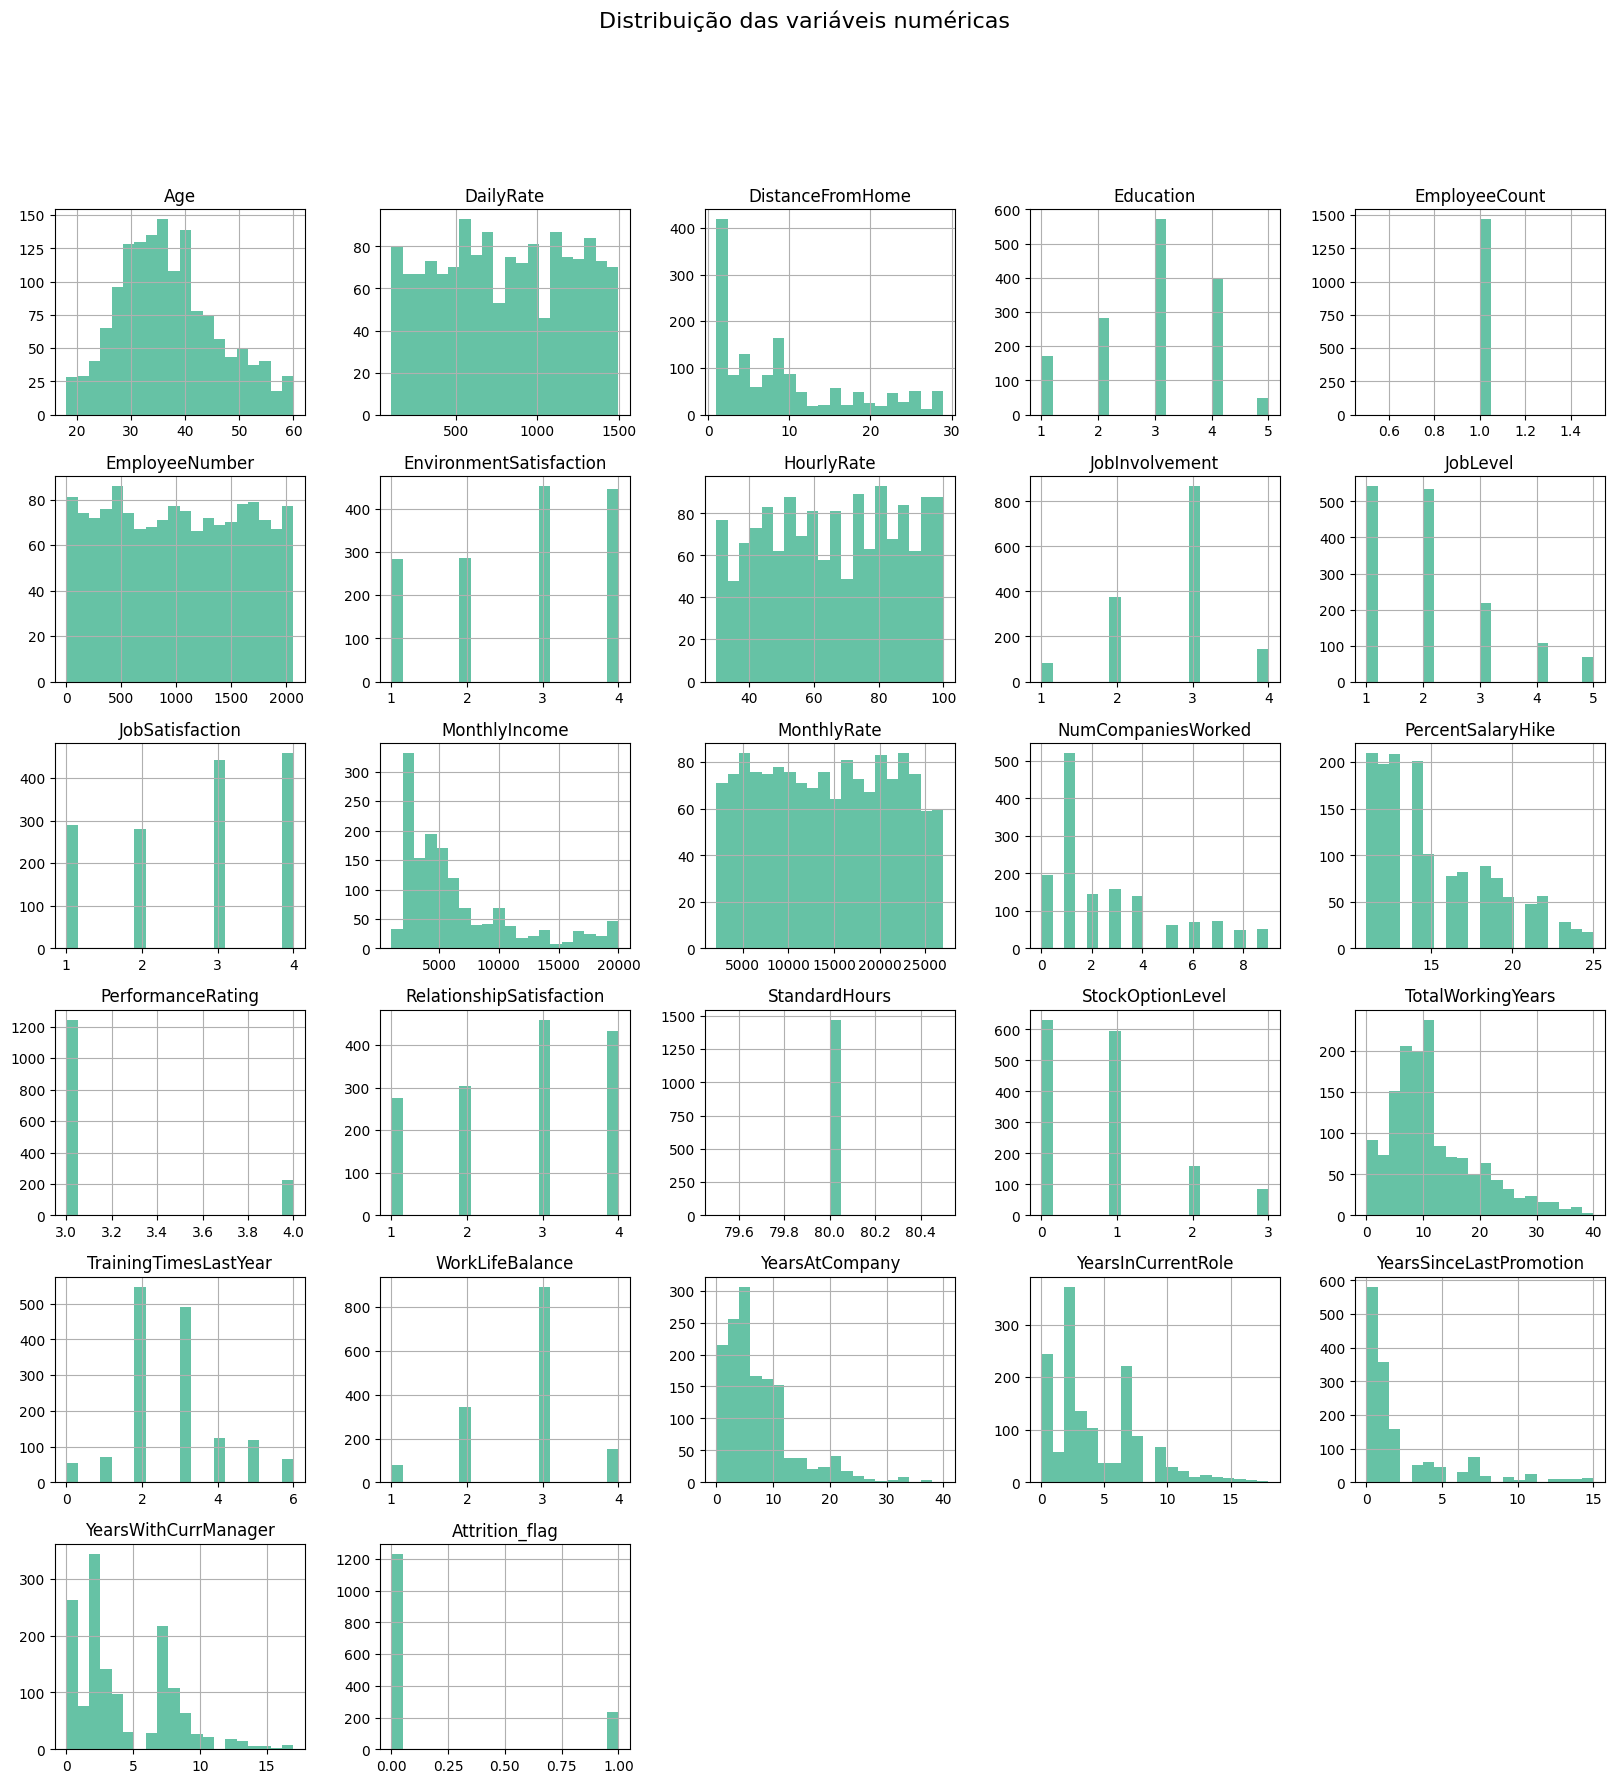

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=20, figsize=(20,20))
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()

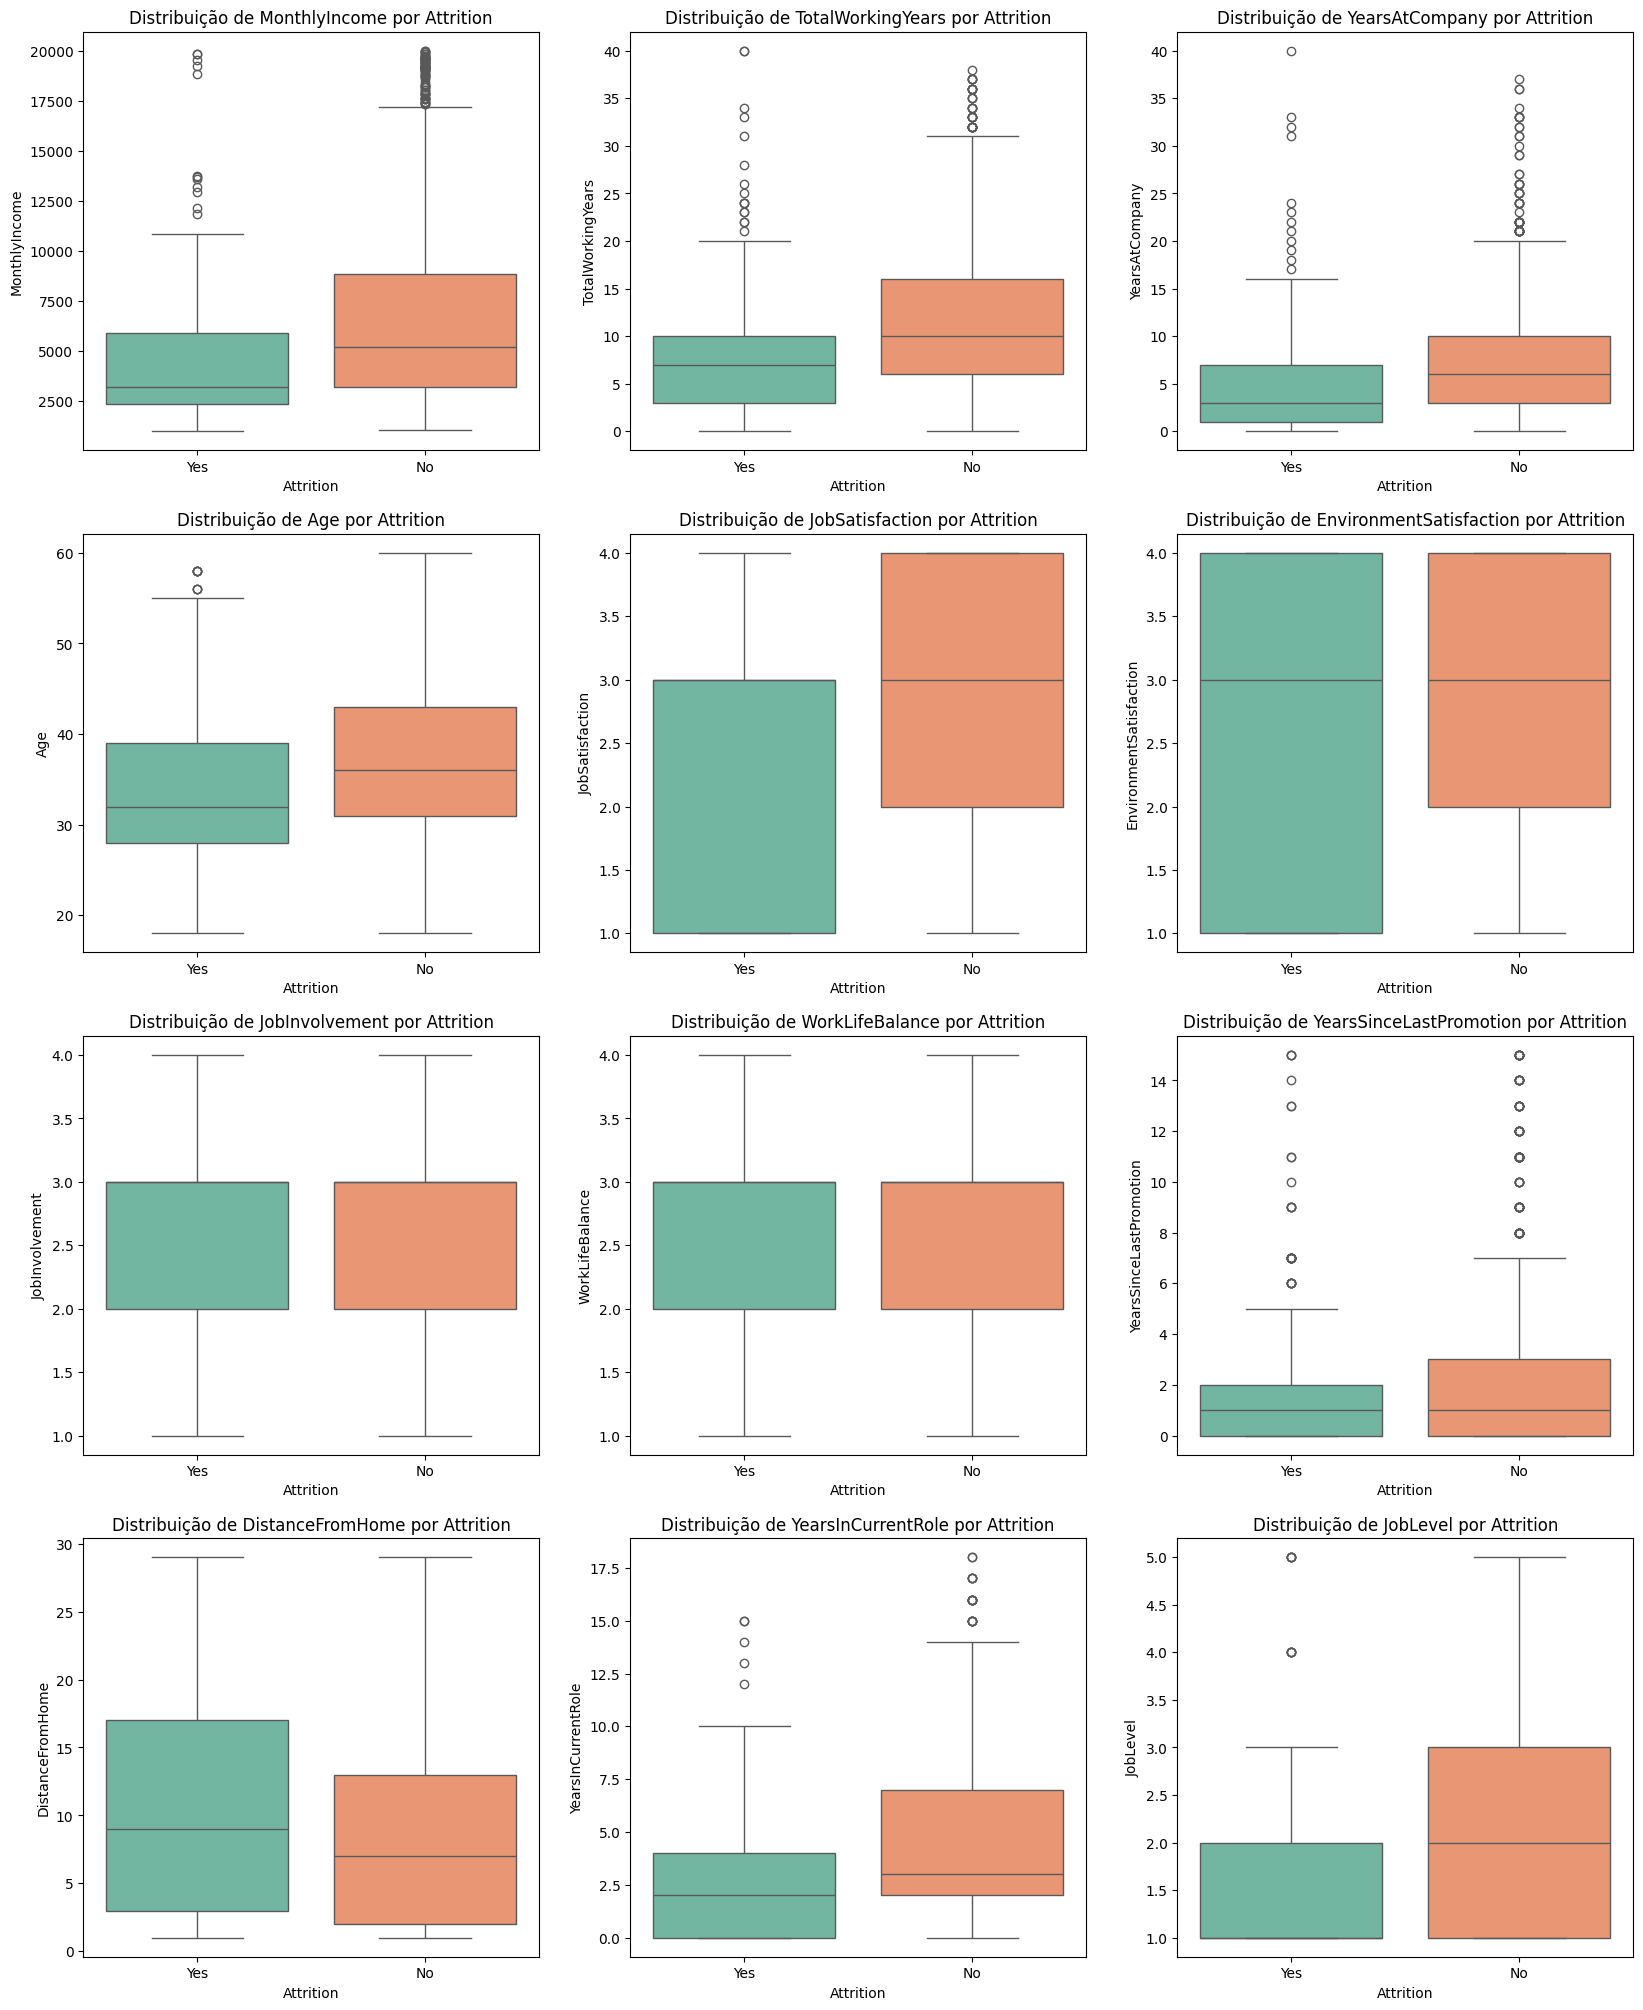

In [12]:
colunas_pertinentes = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','Age',
    'JobSatisfaction','EnvironmentSatisfaction','JobInvolvement','WorkLifeBalance',
    'YearsSinceLastPromotion','DistanceFromHome', 'YearsInCurrentRole', 'JobLevel']

n_cols = 3
n_rows = (len(colunas_pertinentes) + n_cols -1) // n_cols

plt.figure(figsize=(20,25))
for i, col in enumerate(colunas_pertinentes,1):
    plt.subplot(n_rows,n_cols,i)
    sns.boxplot(x='Attrition', y=col, data=df, palette='Set2', hue='Attrition')
    plt.title(f'Distribuição de {col} por Attrition')
plt.tight_layout
plt.show()

## 6. Distribuição de variáveis categóricas
🔎 **Objetivo:** Countplots mostram a frequência de cada categoria, facilitando a identificação de predominâncias. Dessa forma, podemos avaliar como variáveis categóricas estão associadas ao turnover e 
e dentificar grupos mais propensos à saída.

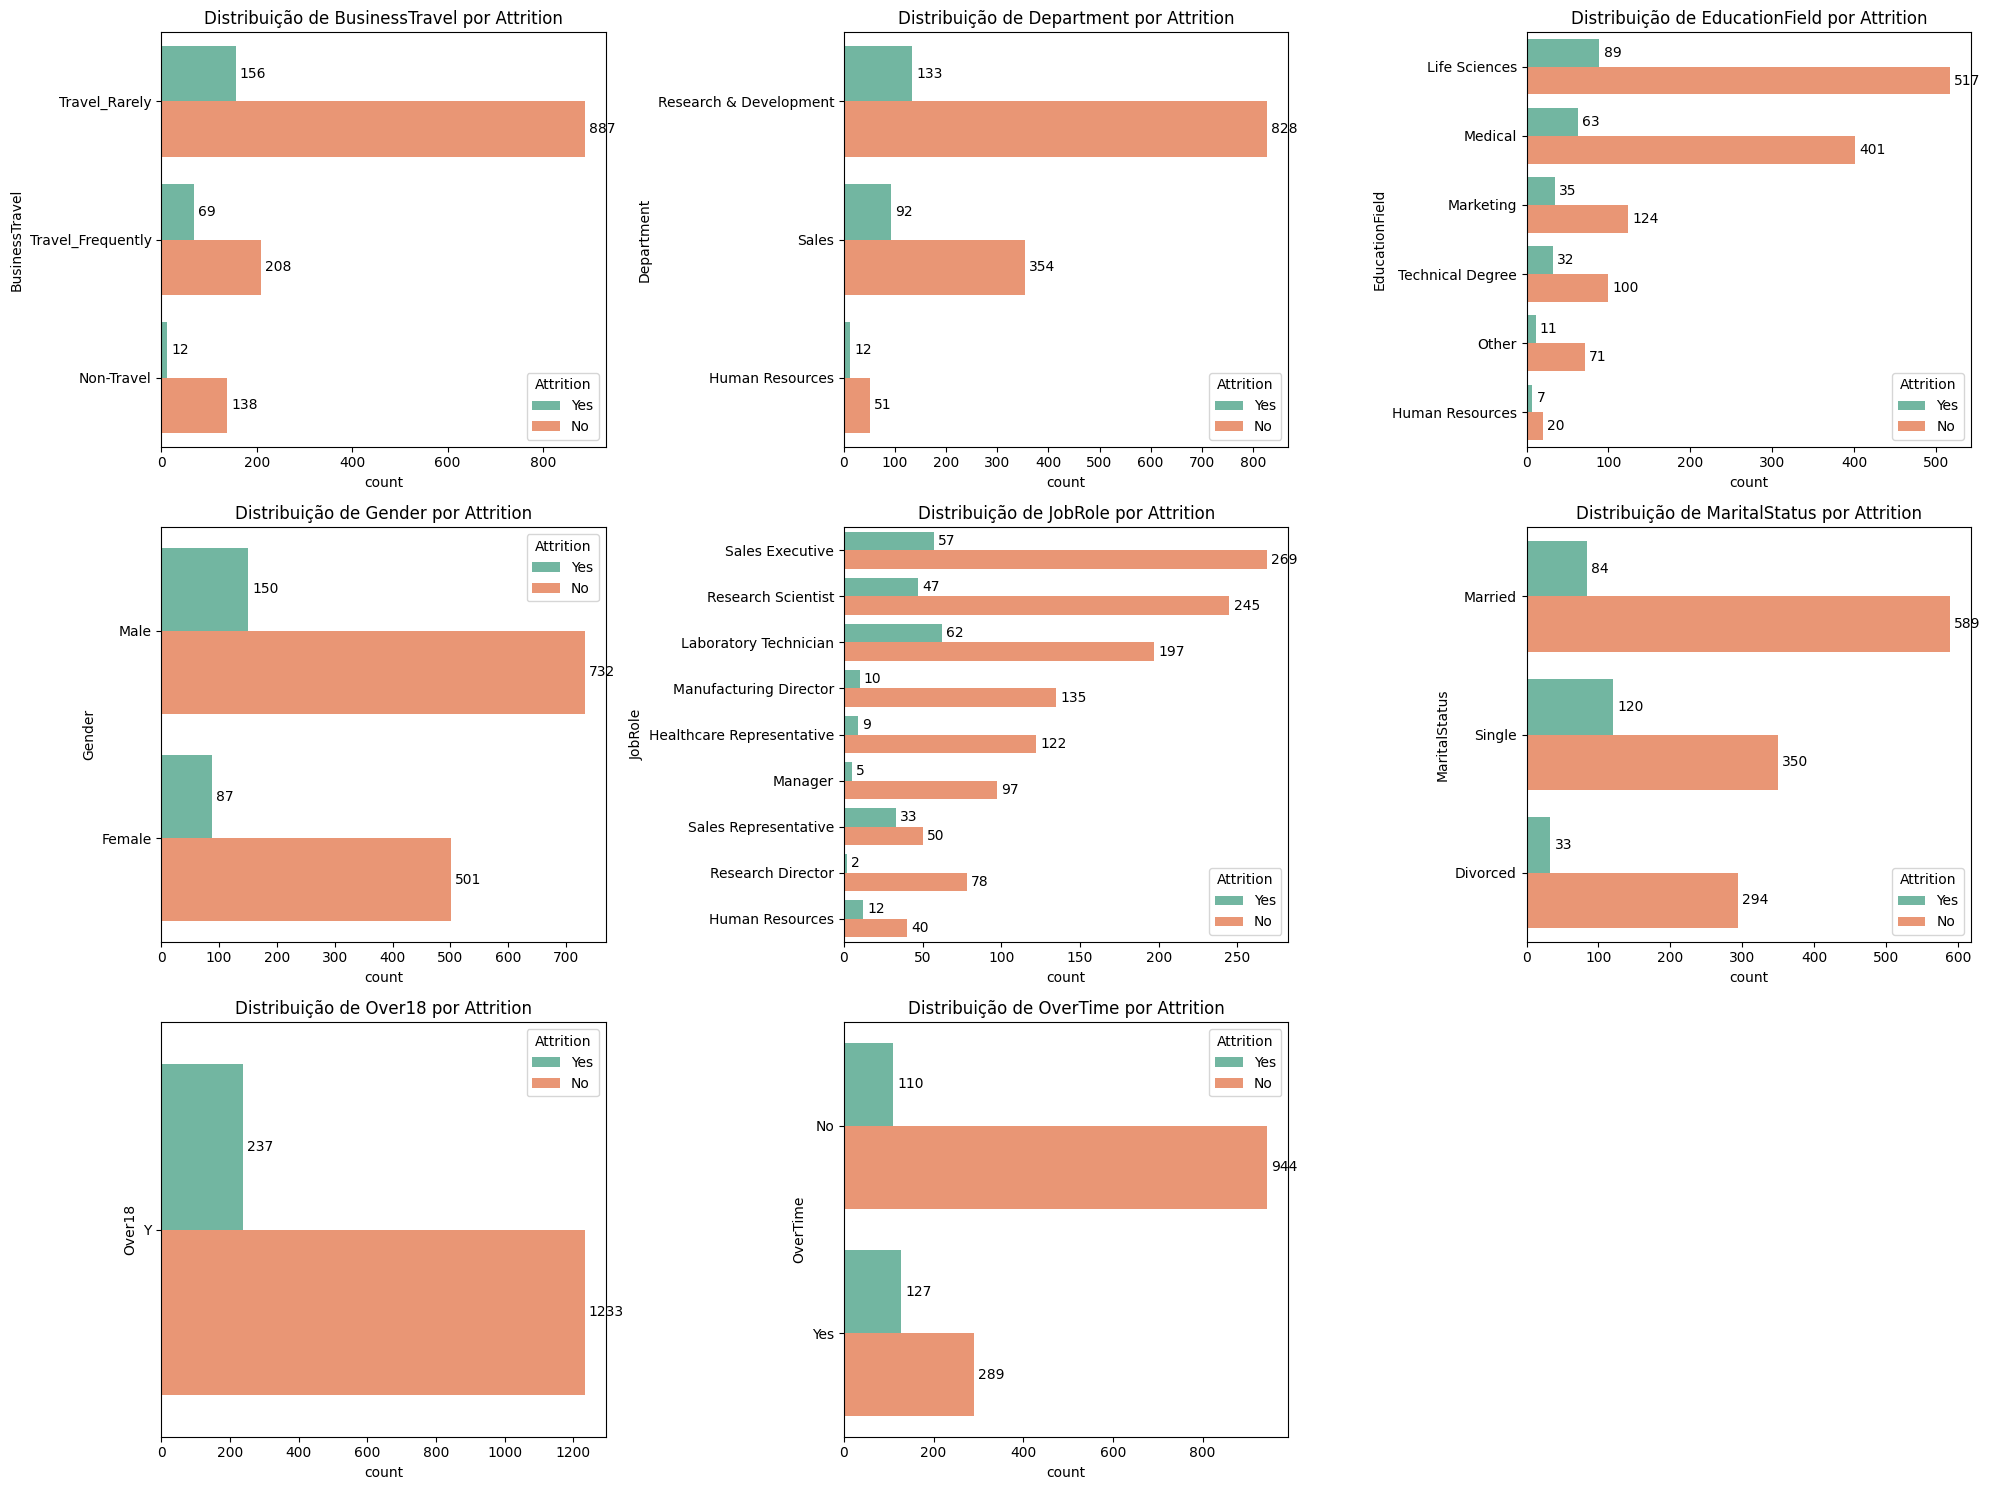

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns.drop('Attrition')
n_cols = 3
n_rows = (len(cat_cols) + n_cols -1)// n_cols

plt.figure(figsize=(20,15))
for i,col in enumerate(cat_cols,1):
    plt.subplot(n_rows,n_cols,i)
    ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2',hue='Attrition')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
    plt.title(f'Distribuição de {col} por Attrition')
plt.tight_layout()
plt.show()

### 3.3. Análise Bivariada: Turnover vs. Variáveis Chave
Agora, vamos aprofundar a análise para entender a relação entre o Attrition (turnover) e as variáveis que selecionamos em nossas hipóteses.

#### Turnover e Horas Extras (H1)
Este gráfico de barras compara a proporção de funcionários que saíram **(Attrition = 'Yes')** versus os que ficaram **(Attrition = 'No')** em relação ao trabalho em horas extras (OverTime).

**Observação Principal:** É evidente que a taxa de turnover é significativamente maior entre os funcionários que trabalham horas extras, validando a Hipótese Analítica H1. Isso sugere que a sobrecarga de trabalho é um fator crítico na decisão de um funcionário de deixar a empresa.

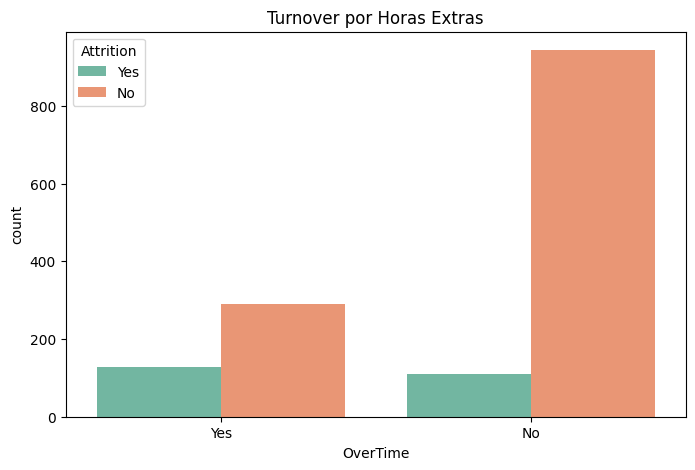

Teste Qui-Quadrado: p-value = 0.0000
A relação entre OverTime e Attrition é estatisticamente significativa.


In [14]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Turnover por Horas Extras')
plt.show()

# Teste Estatístico (Chi-Quadrado)
contingency_table = pd.crosstab(df['OverTime'], df['Attrition'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Teste Qui-Quadrado: p-value = {p_value:.4f}')
if p_value < 0.05:
    print('A relação entre OverTime e Attrition é estatisticamente significativa.')
else:
    print('Não há relação estatisticamente significativa.')

### Turnover e Renda Mensal (H3)  
Este boxplot compara a distribuição da renda mensal `(MonthlyIncome)` entre os grupos de funcionários que saíram e os que ficaram. Ele nos ajuda a verificar se a renda é um fator discriminante para a decisão de deixar a empresa.

**Observação Principal**: O gráfico mostra que o grupo que saiu **(Attrition = 'Yes')** possui uma mediana de renda menor em comparação com o grupo que ficou. Isso valida a Hipótese Analítica H3, indicando que a remuneração pode ser um fator decisivo para a rotatividade.

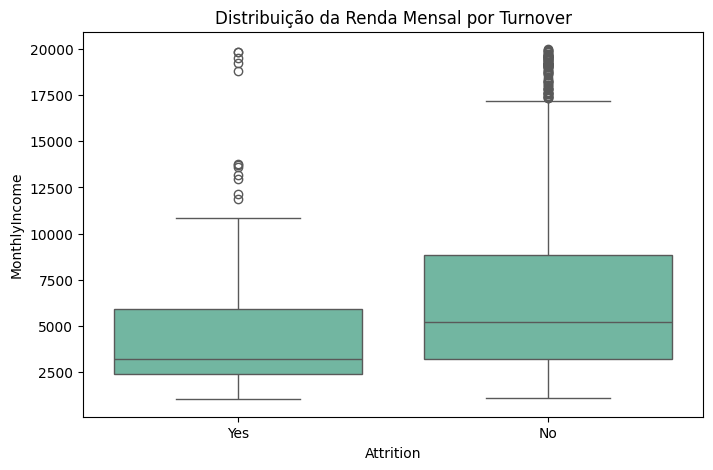

Teste T de Student: p-value = 0.0000
A diferença nas médias de renda é estatisticamente significativa.


In [15]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Distribuição da Renda Mensal por Turnover')
plt.show()

# Teste Estatístico (Teste T)
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_value = ttest_ind(attrition_yes, attrition_no, equal_var=False)
print(f'Teste T de Student: p-value = {p_value:.4f}')
if p_value < 0.05:
    print('A diferença nas médias de renda é estatisticamente significativa.')
else:
    print('Não há diferença estatisticamente significativa.')

#### Mapa de Calor de Correlação
Este mapa de calor visualiza a correlação entre as variáveis numéricas do conjunto de dados. Cores mais claras indicam correlação positiva forte, enquanto cores mais escuras indicam correlação negativa forte.

**Observação Principal**: É possível observar que `TotalWorkingYears`, `JobLevel` e `MonthlyIncome` são positivamente correlacionados entre si. Variáveis como `JobSatisfaction` e `EnvironmentSatisfaction` também mostram correlações interessantes, que podem ser exploradas em análises mais profundas.

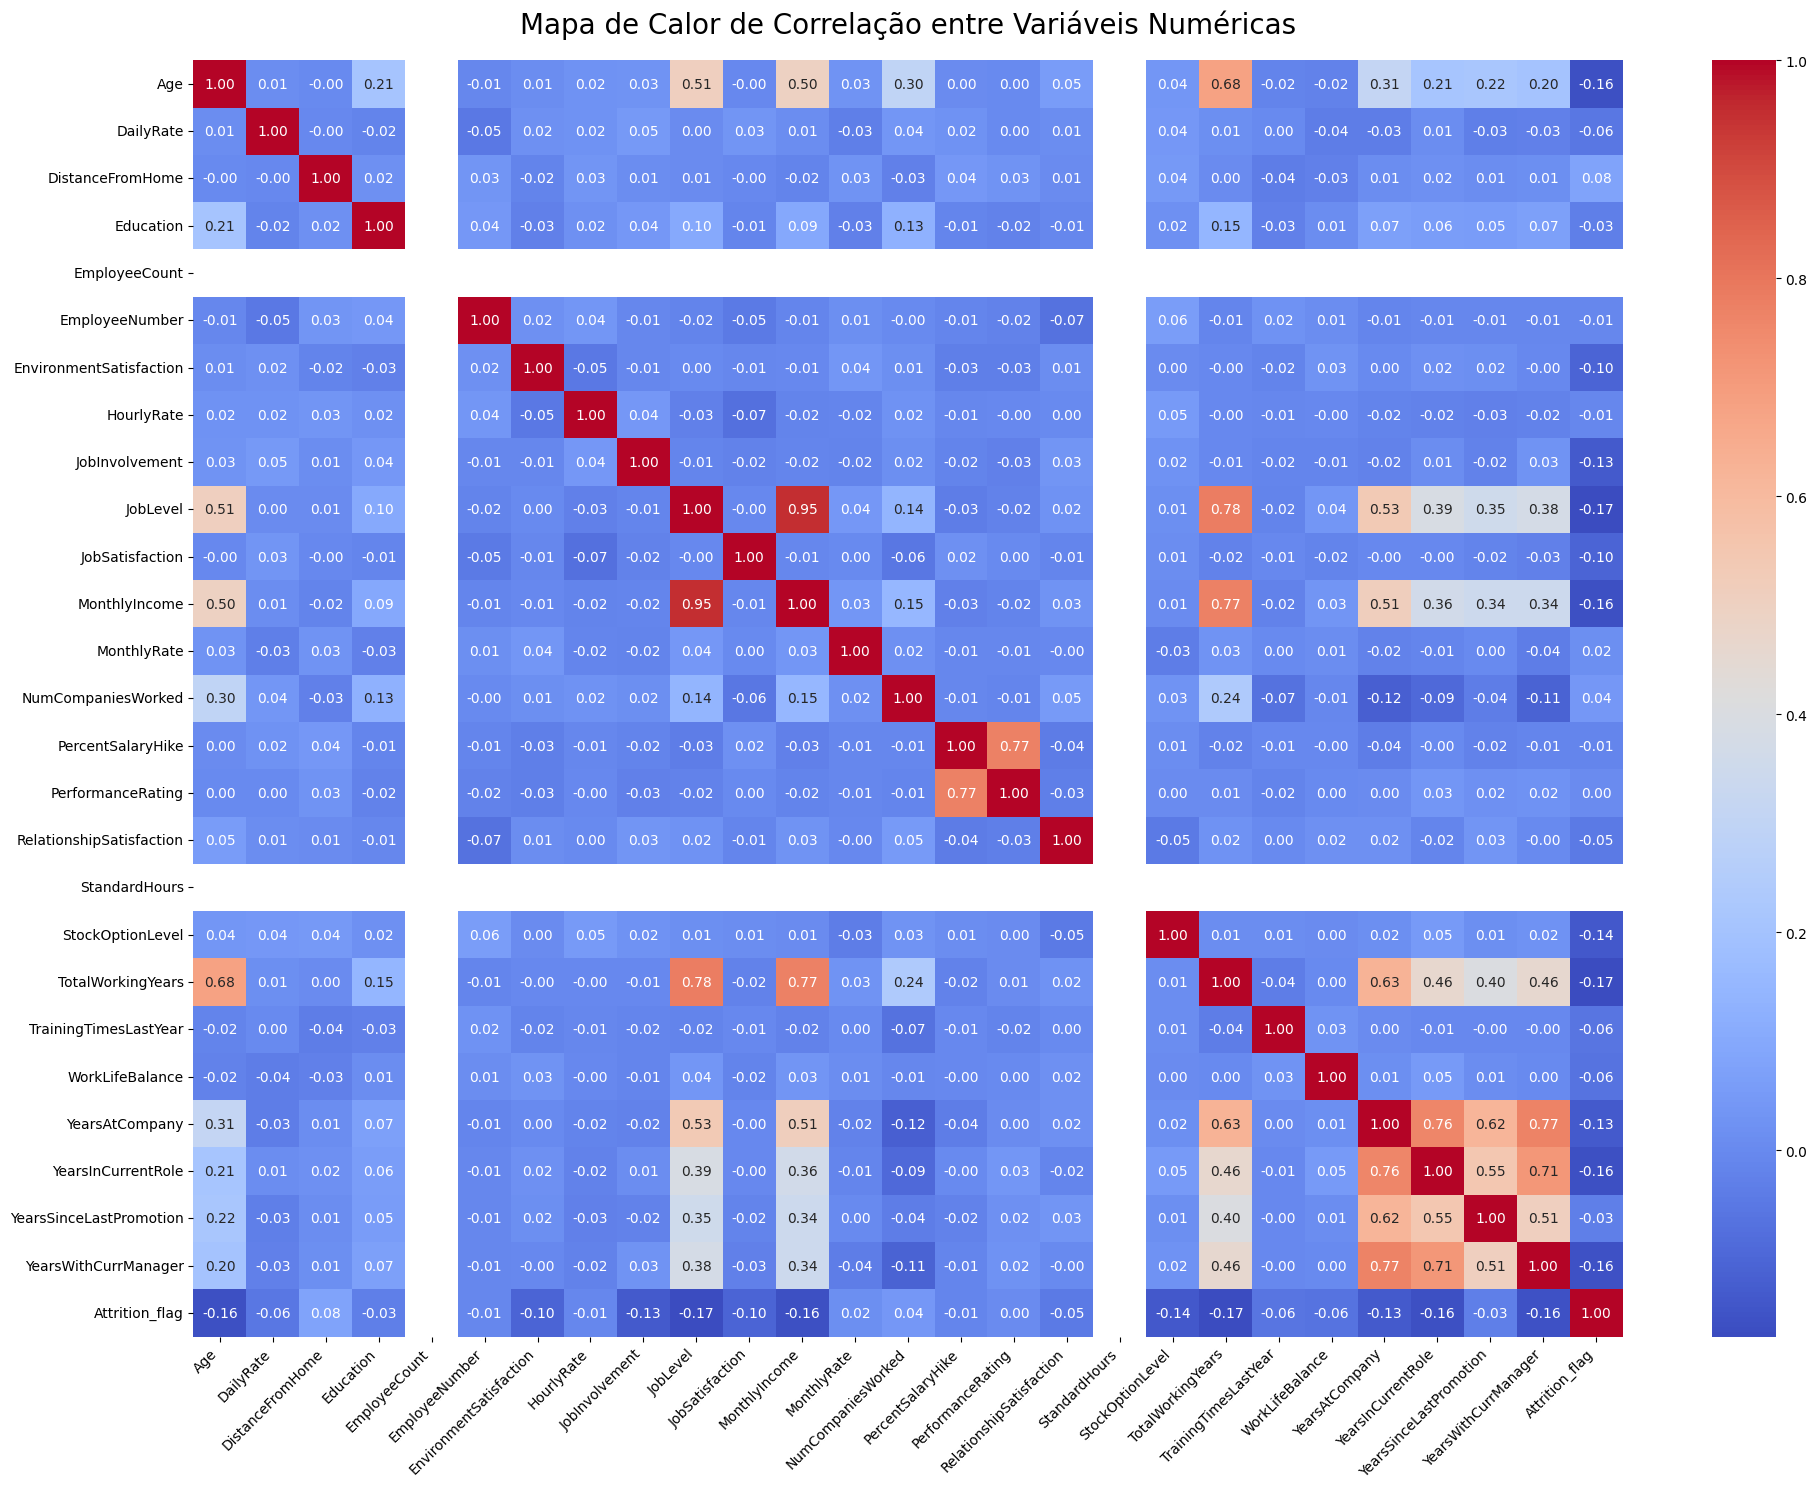

In [16]:
correlations = df[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

## 4. Conclusões e Recomendações
Com base nas análises exploratórias, pudemos validar algumas de nossas hipóteses e chegar a conclusões importantes para o negócio:

- **Impacto do salário e plano de carreira**: Funcionários com menor renda e que não foram promovidos recentemente têm uma alta taxa de rotatividade. Recomendação: Revisar a política salarial e os planos de carreira para garantir que sejam competitivos.

- **Impacto do horário de trabalho**: O trabalho em horas extras está fortemente correlacionado com o turnover. Recomendação: É fundamental revisar a carga de trabalho em certas equipes para evitar o esgotamento (burnout) e a perda de talentos.

- **Diferenças entre departamentos e cargos**: A rotatividade não afeta todos os departamentos igualmente. Recomendação: Áreas como Sales e Research & Development merecem atenção especial para entender as causas específicas do turnover nesses setores.

 Conhecimento de Negócio (Análise Qualitativa)  
2. Análise Estatística (Análise Quantitativa)  
Análise Exploratória de Dados (EDA)  
Cálculo de Correlação  
Testes de Significância  